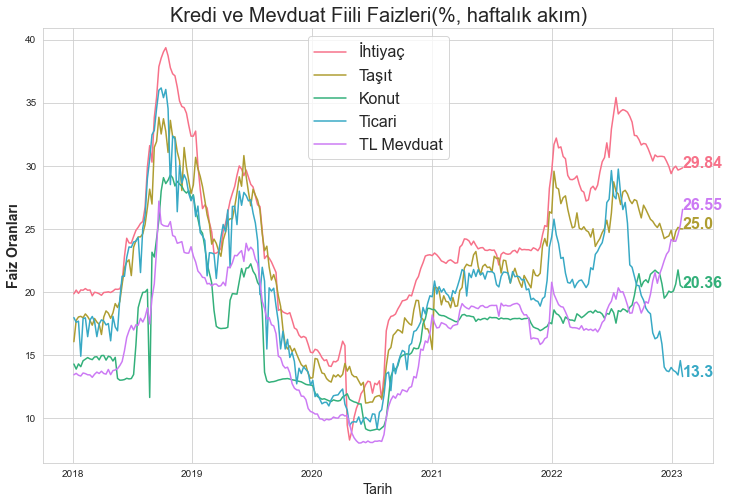

In [21]:
from evds import evdsAPI
evds= evdsAPI('YourAPIKey')

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

def interestrates(vars_dict, sd, ed):

    # Load data and format the date column
    df = evds.get_data(list(vars_dict.keys()), startdate=sd, enddate=ed)
    df['Tarih'] = pd.to_datetime(df['Tarih'], dayfirst=True)

    # Replace dots with underscores in the column names
    df.columns = df.columns.str.replace('.', '_')

    # Set the color palette for the line plots
    colors = sns.color_palette("husl", len(vars_dict))

    # Create a line plot for each variable
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))
    for i, (var_code, var_name) in enumerate(vars_dict.items()):
        sns.lineplot(data=df, x='Tarih', y=var_code.replace('.', '_'), color=colors[i], label=var_name)
        # Add text annotations for the last value of each line
        plt.text(df['Tarih'].iloc[-1], df[var_code.replace('.', '_')].iloc[-1], str(df[var_code.replace('.', '_')].iloc[-1]), color=colors[i], fontsize=16, weight='bold')

    # Add titles and labels
    plt.title('Kredi ve Mevduat Fiili Faizleri(%, haftalık akım)', fontsize=20)
    plt.xlabel('Tarih', fontsize=14)
    plt.ylabel('Faiz Oranları', fontsize=14, weight='bold')
    plt.legend(fontsize=16)
    plt.show()


vars_dict={"TP.KTF10": "İhtiyaç", "TP.KTF11": "Taşıt", "TP.KTF12": "Konut", "TP.KTF17": "Ticari", "TP.TRY.MT02": "TL Mevduat"}
sd="01-01-2018"
ed="30-01-2023"    
    

interestrates(vars_dict, sd, ed)
